In [6]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from plotnine.data import mtcars

In [9]:
mat_corr_without_index = np.round(mtcars.corr(), 1)
mat_corr_without_index

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0,-0.9,-0.8,-0.8,0.7,-0.9,0.4,0.7,0.6,0.5,-0.6
cyl,-0.9,1.0,0.9,0.8,-0.7,0.8,-0.6,-0.8,-0.5,-0.5,0.5
disp,-0.8,0.9,1.0,0.8,-0.7,0.9,-0.4,-0.7,-0.6,-0.6,0.4
hp,-0.8,0.8,0.8,1.0,-0.4,0.7,-0.7,-0.7,-0.2,-0.1,0.7
drat,0.7,-0.7,-0.7,-0.4,1.0,-0.7,0.1,0.4,0.7,0.7,-0.1
wt,-0.9,0.8,0.9,0.7,-0.7,1.0,-0.2,-0.6,-0.7,-0.6,0.4
qsec,0.4,-0.6,-0.4,-0.7,0.1,-0.2,1.0,0.7,-0.2,-0.2,-0.7
vs,0.7,-0.8,-0.7,-0.7,0.4,-0.6,0.7,1.0,0.2,0.2,-0.6
am,0.6,-0.5,-0.6,-0.2,0.7,-0.7,-0.2,0.2,1.0,0.8,0.1
gear,0.5,-0.5,-0.6,-0.1,0.7,-0.6,-0.2,0.2,0.8,1.0,0.3


In [10]:
mat_corr_with_index = np.round(mtcars.corr(), 1).reset_index()
mat_corr_with_index

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,mpg,1.0,-0.9,-0.8,-0.8,0.7,-0.9,0.4,0.7,0.6,0.5,-0.6
1,cyl,-0.9,1.0,0.9,0.8,-0.7,0.8,-0.6,-0.8,-0.5,-0.5,0.5
2,disp,-0.8,0.9,1.0,0.8,-0.7,0.9,-0.4,-0.7,-0.6,-0.6,0.4
3,hp,-0.8,0.8,0.8,1.0,-0.4,0.7,-0.7,-0.7,-0.2,-0.1,0.7
4,drat,0.7,-0.7,-0.7,-0.4,1.0,-0.7,0.1,0.4,0.7,0.7,-0.1
5,wt,-0.9,0.8,0.9,0.7,-0.7,1.0,-0.2,-0.6,-0.7,-0.6,0.4
6,qsec,0.4,-0.6,-0.4,-0.7,0.1,-0.2,1.0,0.7,-0.2,-0.2,-0.7
7,vs,0.7,-0.8,-0.7,-0.7,0.4,-0.6,0.7,1.0,0.2,0.2,-0.6
8,am,0.6,-0.5,-0.6,-0.2,0.7,-0.7,-0.2,0.2,1.0,0.8,0.1
9,gear,0.5,-0.5,-0.6,-0.1,0.7,-0.6,-0.2,0.2,0.8,1.0,0.3


In [13]:
mydata = pd.melt(mat_corr_with_index, id_vars = "index", var_name = "var", value_name = "value")
mydata["abs_value"] = np.abs(mydata["value"])
mydata

,index,var,value,abs_value
0,mpg,mpg,1.0,1.0
1,cyl,mpg,-0.9,0.9
2,disp,mpg,-0.8,0.8
3,hp,mpg,-0.8,0.8
4,drat,mpg,0.7,0.7
...,...,...,...,...
116,qsec,carb,-0.7,0.7
117,vs,carb,-0.6,0.6
118,am,carb,0.1,0.1
119,gear,carb,0.3,0.3


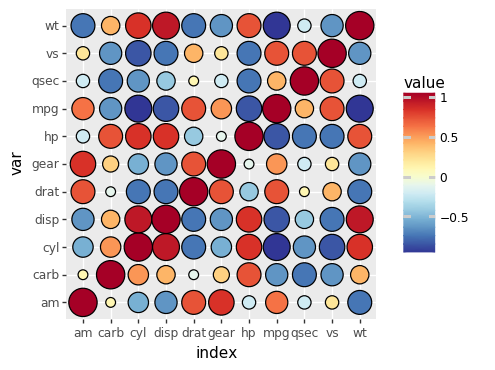

<ggplot: (8791244941405)>


In [27]:
base_plot = (
    ggplot(mydata, aes(x = "index", y = "var", fill = "value", size = "abs_value")) + 
        geom_point(shape = "o", colour = "black") + 
        scale_size_area(max_size = 11, guide = False) +
        scale_fill_cmap(name = "RdYlBu_r") +
        coord_equal() +
        theme(dpi = 100, figure_size = (4, 4))
)
print(base_plot)

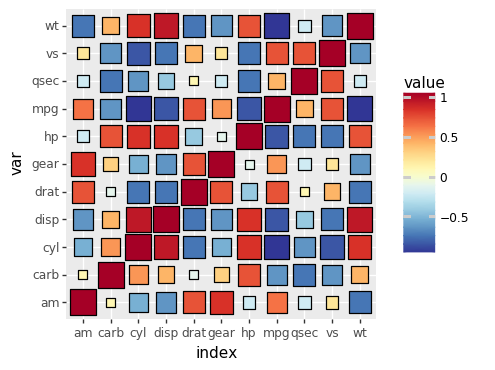

<ggplot: (8791266044245)>


In [30]:
base_plot = (
    ggplot(mydata, aes(x = "index", y = "var", fill = "value", size = "abs_value")) + 
        geom_point(shape = "s", colour = "black") + 
        scale_size_area(max_size = 10, guide = False) +
        scale_fill_cmap(name = "RdYlBu_r") +
        coord_equal() +
        theme(dpi = 100, figure_size = (4, 4))
)
print(base_plot)

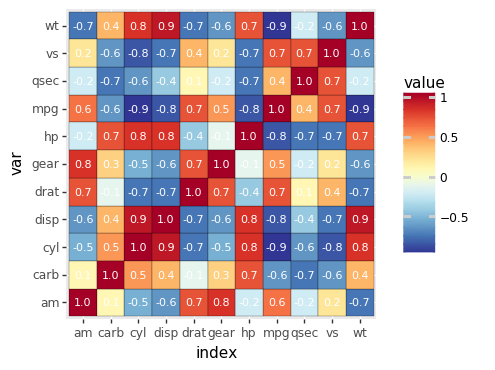

<ggplot: (8791228150313)>


In [35]:
base_plot = (
    ggplot(mydata, aes(x = "index", y = "var", fill = "value", label = "value")) + 
        geom_tile(colour = "black") +
        geom_text(size = 8, colour = "white") +
        scale_fill_cmap(name = "RdYlBu_r") +
        coord_equal() +
        theme(dpi = 100, figure_size = (4, 4))
)
print(base_plot)